In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os

In [2]:
#Lets read images with expressions
face_img0 = cv2.imread("C:/Users/rupik/Documents/Edu labs/Face exp/face_expression_images/train/angry/0.jpg")
face_img1 = cv2.imread("C:/Users/rupik/Documents/Edu labs/Face exp/face_expression_images/train/disgust/299.jpg")
face_img2 = cv2.imread("C:/Users/rupik/Documents/Edu labs/Face exp/face_expression_images/train/fear/2.jpg")

face_img3 = cv2.imread("C:/Users/rupik/Documents/Edu labs/Face exp/face_expression_images/train/happy/7.jpg")

face_img4 = cv2.imread("C:/Users/rupik/Documents/Edu labs/Face exp/face_expression_images/train/neutral/4.jpg")
face_img5 = cv2.imread("C:/Users/rupik/Documents/Edu labs/Face exp/face_expression_images/train/sad/6.jpg")
face_img6 = cv2.imread("C:/Users/rupik/Documents/Edu labs/Face exp/face_expression_images/train/surprise/88.jpg")


In [3]:
faces = [face_img0, face_img1, face_img2, face_img3, face_img4, face_img5, face_img6]
facial_expression = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

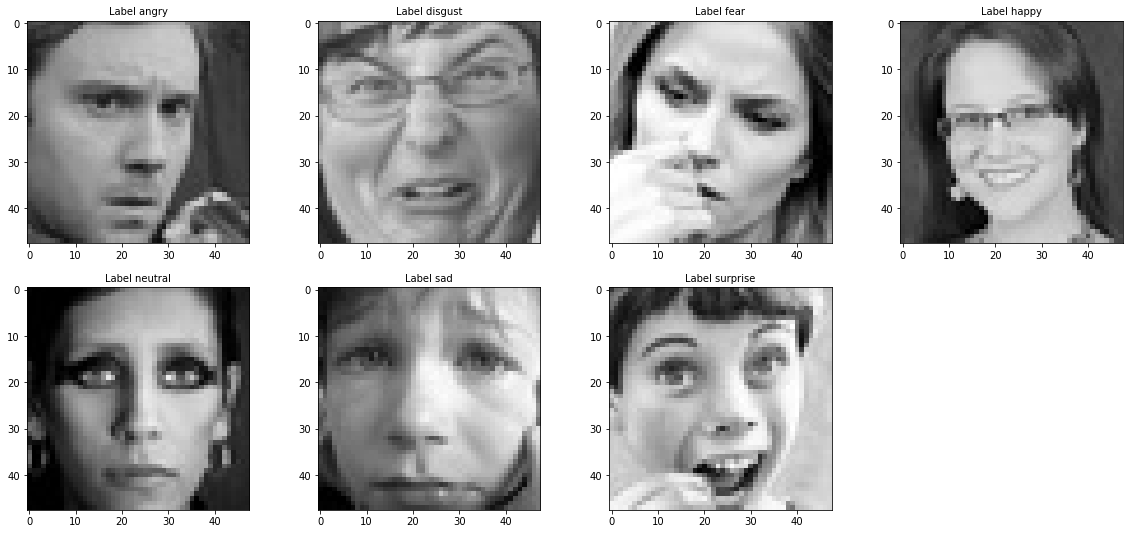

In [4]:
# Subplotting displaying all expressions plots as single image plot
fig = plt.figure(figsize=(20,9))

for index, (image,label) in enumerate (zip(faces[:], facial_expression[:])):
    # Add subplotting to display multiple images
    fig.add_subplot(2, 4, index + 1)
    plt.imshow(image, cmap = 'gray')
    plt.title('Label %s' %label, fontsize = 10)
plt.show()

In [5]:
face_img0.shape

(48, 48, 3)

### Image Data Augmentation
* All RGB Image Data will be used to create new samples for Training
* New Sample will be transformed using Image Data Generator
* Images will be resampled using pixel normalization (Divide each pixel value by 255), shear range, zoom, brightness etc.

In [6]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from numpy import expand_dims

In [7]:
# load_img() used to load image data
img = load_img("C:/Users/rupik/Documents/Edu labs/Face exp/face_expression_images/train/happy/7.jpg")

In [8]:
data = img_to_array(img)
# axis = 0: rowwise, axis = 1 (columnwise)
samples = expand_dims(data, axis = 0)

In [9]:
# 350 x 525 x 3 = Shape of Image, 3 = RGB Matrix
data.shape

(48, 48, 3)

In [10]:
samples.shape

(1, 48, 48, 3)

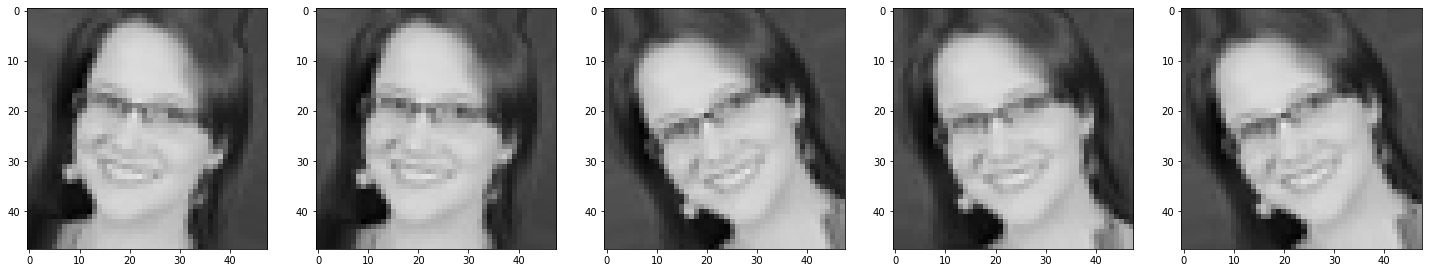

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
# Rotation of Image
datagen = ImageDataGenerator(rotation_range=20)
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (25,15))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

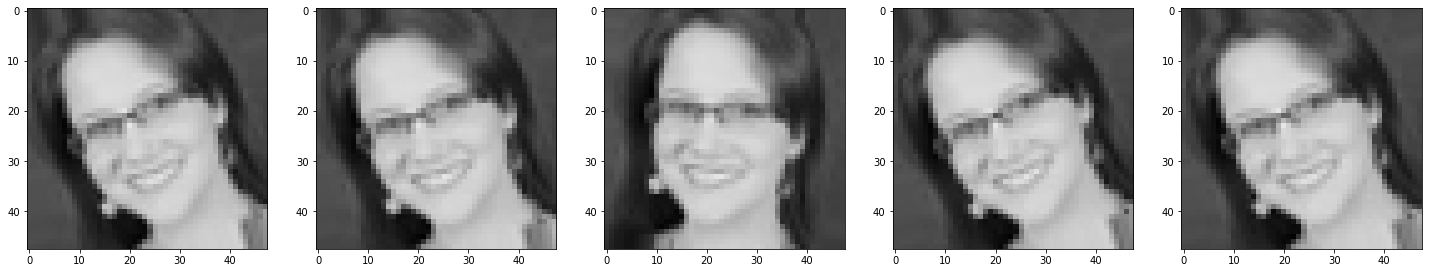

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
# Rotation of Image
datagen = ImageDataGenerator(rotation_range=20)
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (25,15))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

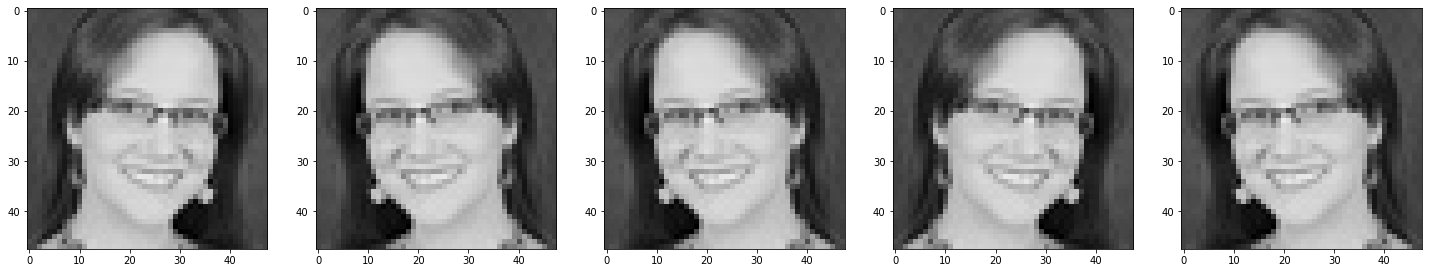

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [13]:
# Horizontal Flip Image Data
datagen = ImageDataGenerator(horizontal_flip=True)
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (25,15))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

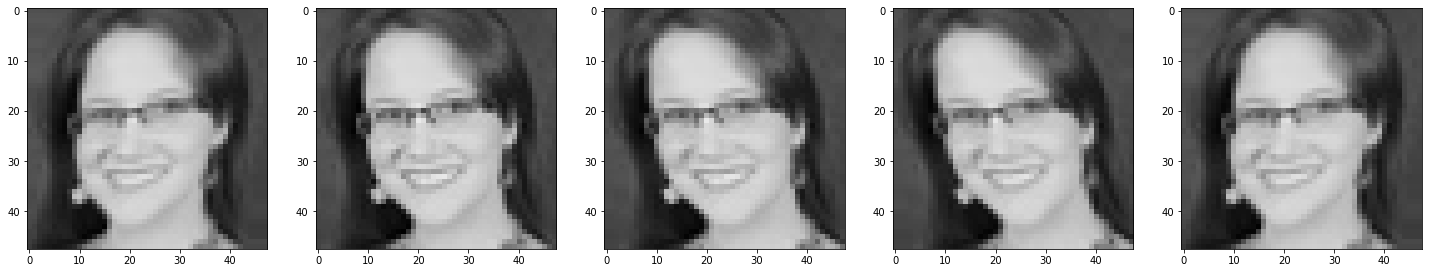

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [14]:
# Shear Range
datagen = ImageDataGenerator(shear_range=10)
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (25,15))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

In [15]:
# Image Pixel Normalization
# Train Image Data Generator
train_datagen = ImageDataGenerator(
                            rescale=1./255, rotation_range=20,shear_range=20, zoom_range=0.2, 
                            fill_mode='nearest',horizontal_flip=True)

# Test Image Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
training_set = train_datagen.flow_from_directory("C:/Users/rupik/Documents/Edu labs/Face exp/face_expression_images/train/", 
                                                  target_size = (48,48),
                                                  batch_size = 32, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory("C:/Users/rupik/Documents/Edu labs/Face exp/face_expression_images/validation/", 
                                            target_size = (48,48),
                                            batch_size = 32, class_mode = 'categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [17]:
training_set.image_shape

training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

In [27]:
def build_model():
    # Model is Sequential 
    model = Sequential()
    # Conv Net Layer - I
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu',
                    input_shape = (48,48,3)))
    # MaxPooling
    model.add(MaxPooling2D())
    
    # Conv Net Layer - II
    model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    # MaxPooling
    model.add(MaxPooling2D())
    
    # Conv Net Layer - III
    model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    # MaxPooling
    model.add(MaxPooling2D())
    
    # Conv Net Layer - III
    model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    # MaxPooling
    model.add(MaxPooling2D())
    
    # Flatten
    model.add(Flatten())
    
    # Fully Connected Layer
    model.add(Dense(units = 256, activation = 'relu'))
    # to avoid overfitting
    model.add(Dropout(0.25))
    # Binary Class Classification O/P Layer
    model.add(Dense(units = 7, activation = 'softmax'))
    
    # Learning Rate(alpha = (0.00001-1)) & Optimizers - Adam
    adam_optimizer = Adam(learning_rate= 0.001)
    
    # Loss - categorical_crossentropy, classification_metrics = 'accuracy'
    model.compile(loss = 'categorical_crossentropy', optimizer = adam_optimizer, metrics = ['accuracy'])
    
    return model

model = build_model()

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 256)       

In [28]:
# Save Best Model 
from tensorflow.keras import callbacks
filepath=('C:/Users/rupik/Documents/Edu labs/Face exp/model_b.hdf5')
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss',save_best_only=True, 
                                       mode='min', verbose=1)
checkpoint

In [30]:
history = model.fit(training_set, validation_data = test_set, epochs=30, shuffle= True, callbacks = [checkpoint], verbose = 1)

Epoch 1/30
901/901 [==============================] - ETA: 0s - loss: 1.8075 - accuracy: 0.2522
Epoch 1: val_loss improved from inf to 1.77238, saving model to C:/Users/rupik/Documents/Edu labs/Face exp\model_b.hdf5
901/901 [==============================] - 774s 859ms/step - loss: 1.8075 - accuracy: 0.2522 - val_loss: 1.7724 - val_accuracy: 0.2662
Epoch 2/30
901/901 [==============================] - ETA: 0s - loss: 1.7583 - accuracy: 0.2743
Epoch 2: val_loss improved from 1.77238 to 1.63248, saving model to C:/Users/rupik/Documents/Edu labs/Face exp\model_b.hdf5
901/901 [==============================] - 690s 765ms/step - loss: 1.7583 - accuracy: 0.2743 - val_loss: 1.6325 - val_accuracy: 0.3457
Epoch 3/30
901/901 [==============================] - ETA: 0s - loss: 1.6259 - accuracy: 0.3608
Epoch 3: val_loss improved from 1.63248 to 1.48619, saving model to C:/Users/rupik/Documents/Edu labs/Face exp\model_b.hdf5
901/901 [==============================] - 661s 733ms/step - loss: 1.6259 

901/901 [==============================] - ETA: 0s - loss: 1.1627 - accuracy: 0.5583
Epoch 25: val_loss improved from 1.12549 to 1.10605, saving model to C:/Users/rupik/Documents/Edu labs/Face exp\model_b.hdf5
901/901 [==============================] - 590s 655ms/step - loss: 1.1627 - accuracy: 0.5583 - val_loss: 1.1060 - val_accuracy: 0.5846
Epoch 26/30
901/901 [==============================] - ETA: 0s - loss: 1.1490 - accuracy: 0.5655
Epoch 26: val_loss improved from 1.10605 to 1.10153, saving model to C:/Users/rupik/Documents/Edu labs/Face exp\model_b.hdf5
901/901 [==============================] - 590s 654ms/step - loss: 1.1490 - accuracy: 0.5655 - val_loss: 1.1015 - val_accuracy: 0.5897
Epoch 27/30
901/901 [==============================] - ETA: 0s - loss: 1.1461 - accuracy: 0.5651
Epoch 27: val_loss did not improve from 1.10153
901/901 [==============================] - 588s 652ms/step - loss: 1.1461 - accuracy: 0.5651 - val_loss: 1.1306 - val_accuracy: 0.5770
Epoch 28/30
901/90